### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Sample dataset

In [2]:
np.random.seed(42)

n_days = 100

dates = pd.date_range(start='2025-01-01', periods=n_days)
steps = np.random.randint(3000, 15000, size=n_days)
calories = steps * 0.04 + np.random.normal(0, 50, n_days)  # calories roughly proportional to steps
sleep_hours = np.random.normal(7, 1.5, n_days).clip(4, 10)
weekdays = [date.day_name() for date in dates]
activity_levels = np.random.choice(['Low', 'Moderate', 'High'], size=n_days, p=[0.3, 0.5, 0.2])

df = pd.DataFrame({
    'Date': dates,
    'Steps': steps,
    'Calories': calories,
    'SleepHours': sleep_hours,
    'Weekday': weekdays,
    'ActivityLevel': activity_levels
})

### Set a Custom Seaborn Theme

In [3]:
sns.set_theme(style="ticks")  

### Examine the Data

In [4]:
# First few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


        Date  Steps    Calories  SleepHours    Weekday ActivityLevel
0 2025-01-01  10270  343.466095    8.565791  Wednesday           Low
1 2025-01-02   3860  110.370437    7.789672   Thursday           Low
2 2025-01-03   8390  279.072385    9.045830     Friday          High
3 2025-01-04   8191  334.361444   10.000000   Saturday          High
4 2025-01-05  14964  627.666140    6.513264     Sunday      Moderate
Date             0
Steps            0
Calories         0
SleepHours       0
Weekday          0
ActivityLevel    0
dtype: int64


### Step Count Distribution

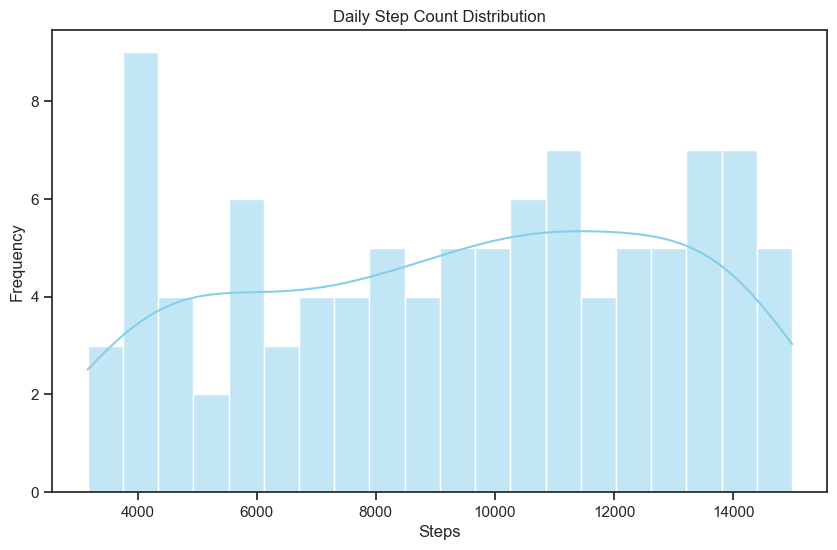

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df['Steps'], bins=20, kde=True, color='skyblue')
plt.title('Daily Step Count Distribution')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.show()

### Calories Burned vs. Steps (Scatter Plot)

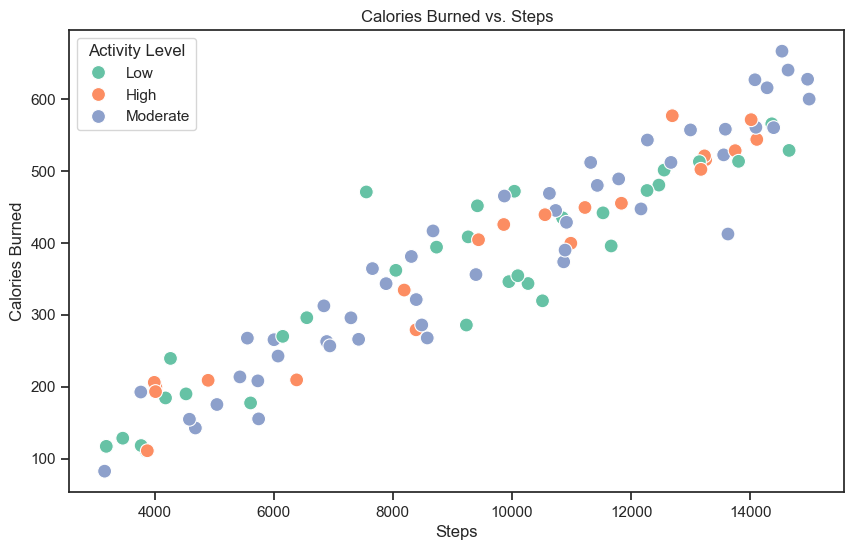

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Steps', y='Calories', hue='ActivityLevel', palette='Set2', s=100)
plt.title('Calories Burned vs. Steps')
plt.xlabel('Steps')
plt.ylabel('Calories Burned')
plt.legend(title='Activity Level')
plt.show()

### FacetGrid for Activity Type

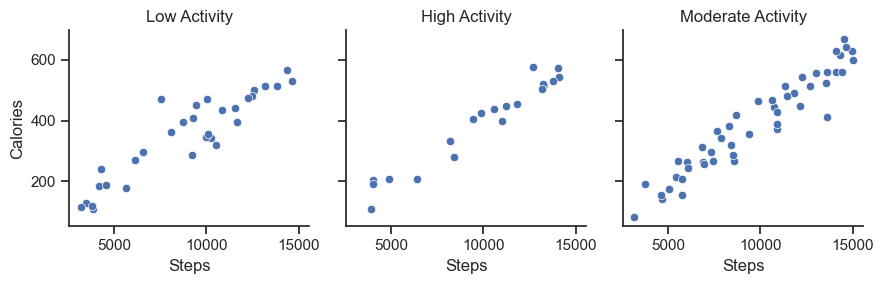

In [10]:
g = sns.FacetGrid(df, col='ActivityLevel')
g.map_dataframe(sns.scatterplot, x='Steps', y='Calories')
g.set_axis_labels('Steps', 'Calories')
g.set_titles(col_template='{col_name} Activity')
plt.show()

### Line Plot for Sleep Duration Over Time

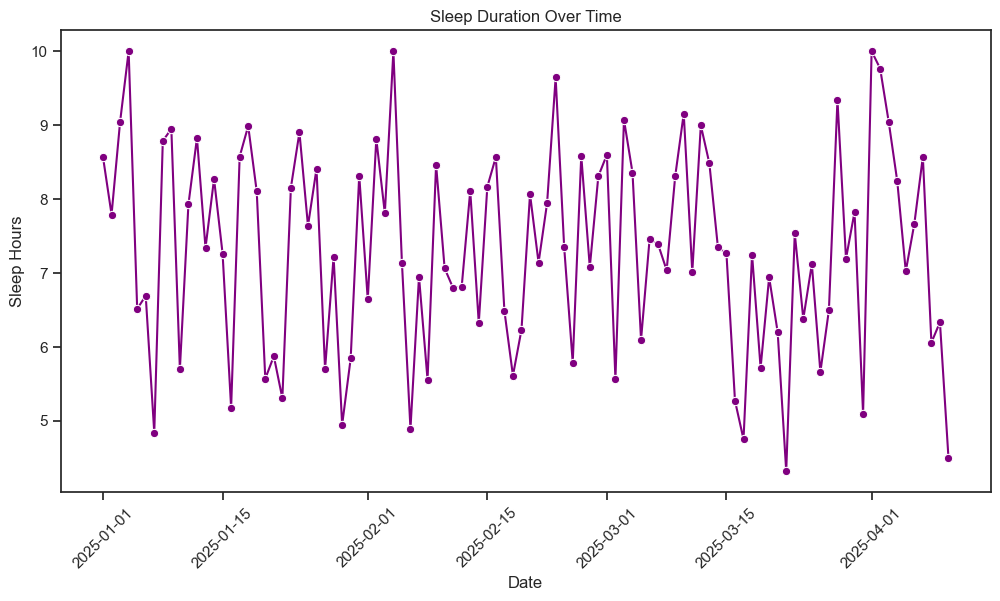

In [11]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='SleepHours', marker='o', color='purple')
plt.title('Sleep Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Sleep Hours')
plt.xticks(rotation=45)
plt.show()

### Box Plot for Daily Steps by Weekday

C:\Users\priya\AppData\Local\Temp\ipykernel_18568\3097319040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Weekday', y='Steps', palette='Pastel1')


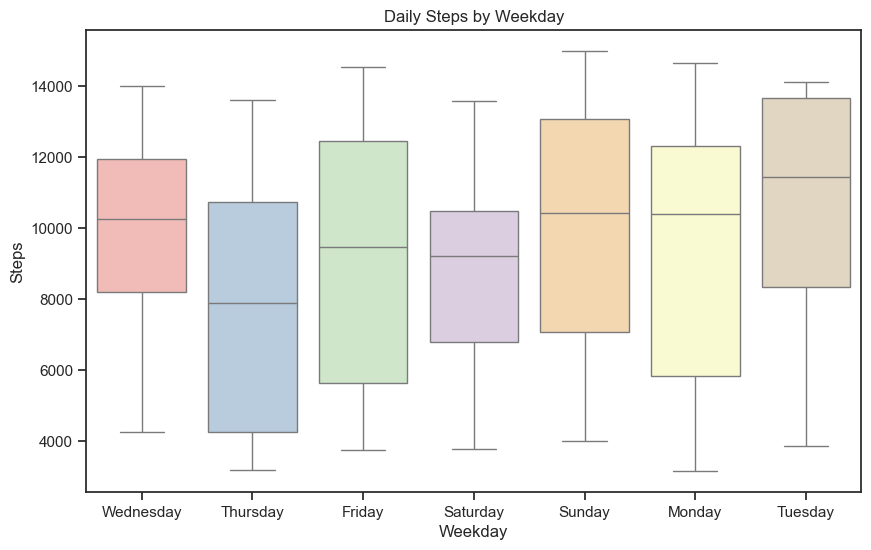

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Weekday', y='Steps', palette='Pastel1')
plt.title('Daily Steps by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Steps')
plt.show()

### Pair Plot to Visualize Relationships Between Variables

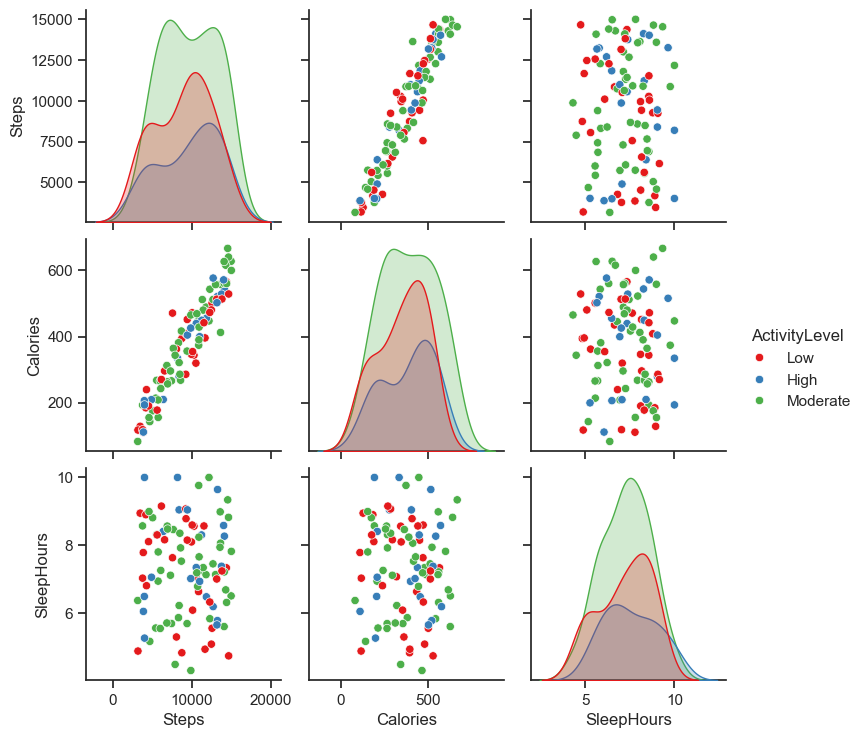

In [13]:
sns.pairplot(df, vars=['Steps', 'Calories', 'SleepHours'], hue='ActivityLevel', palette='Set1', diag_kind='kde')
plt.show()

### Multi-Panel Plots for Sleep and Steps

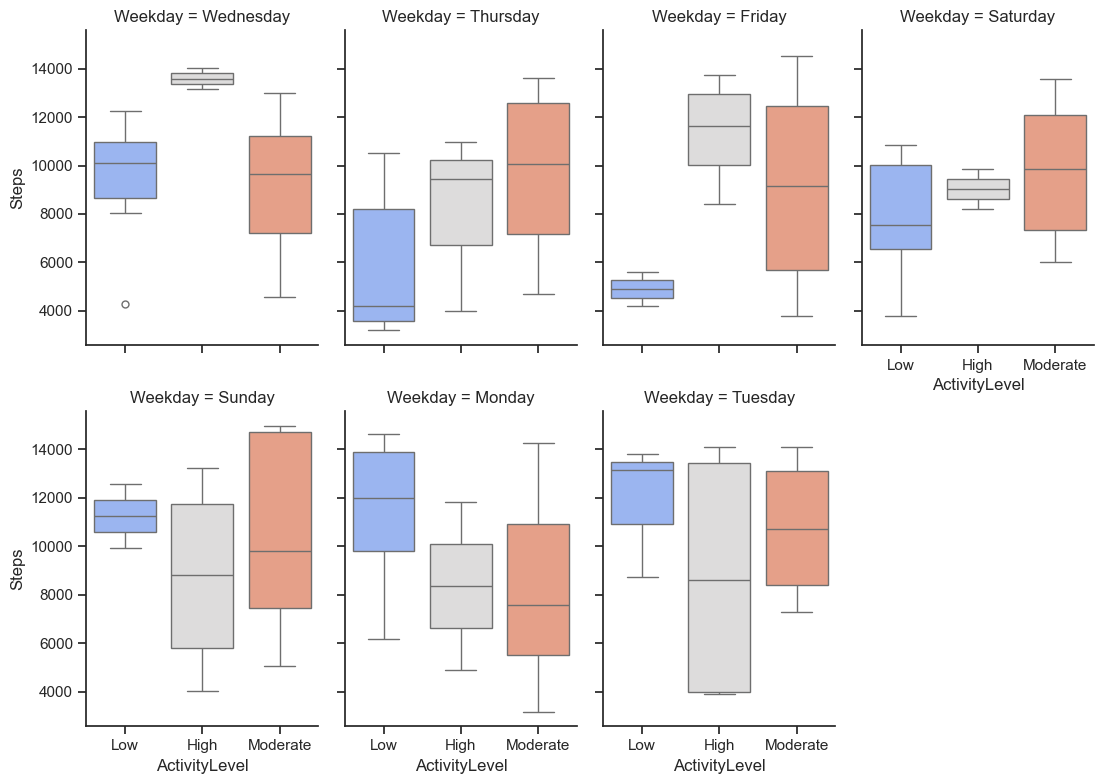

In [21]:
sns.catplot(
    data=df, x='ActivityLevel', y='Steps', hue='ActivityLevel',
    col='Weekday', kind='box', height=4, aspect=0.7, palette='coolwarm',
    col_wrap=4  
)
plt.show()

### Save and Export Visualizations

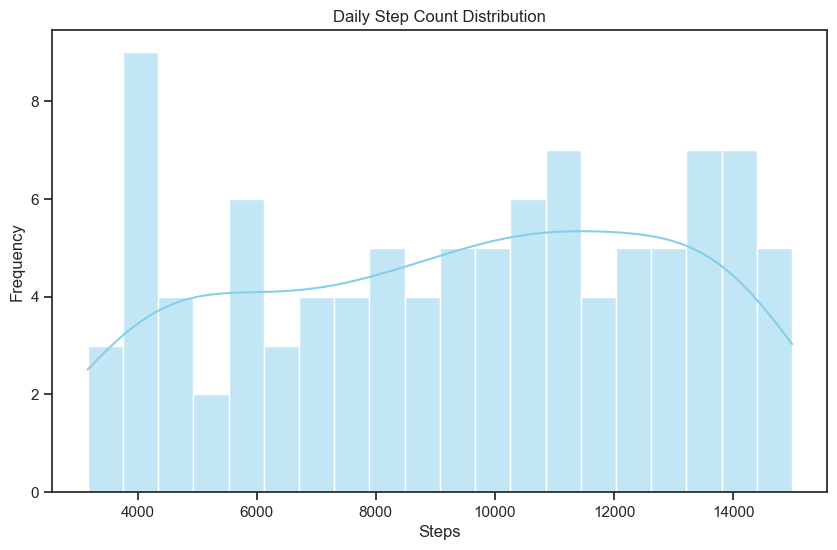

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(df['Steps'], bins=20, kde=True, color='skyblue')
plt.title('Daily Step Count Distribution')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.savefig('step_count_distribution.png', dpi=300)
plt.savefig('step_count_distribution.svg', dpi=300)
plt.show()

### Heatmap for Correlation Analysis

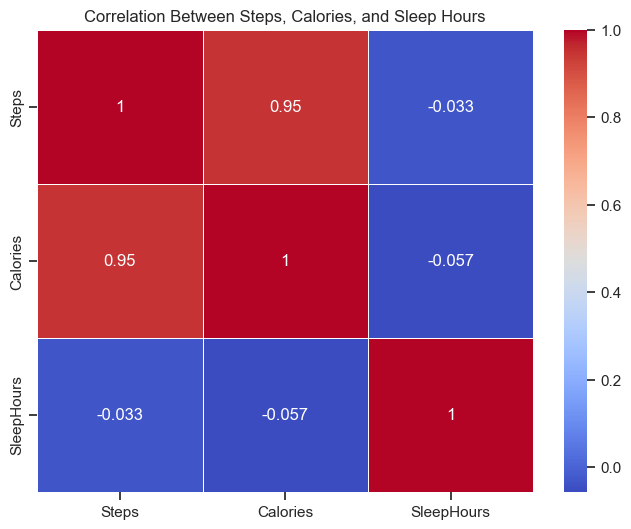

In [18]:
plt.figure(figsize=(8,6))
corr = df[['Steps', 'Calories', 'SleepHours']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Steps, Calories, and Sleep Hours')
plt.show()